# XGBoost Model

## Step 1: Import packages and set working directory

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import optuna

In [2]:
# Optional Code: Here's a format for setting working directory, change as needed
import os
# os.chdir('/path/to/the/project')
os.chdir('/Users/zihanji/Desktop/DS340W')

## Step 2: Load the final cleaned data

In [3]:
data_final = pd.read_csv('./project/volume/data/processed/data_final.csv')

## Step 3: Building the XGBoost model

In [4]:
# Split the data to features and result
x = data_final.drop('SalePrice', axis = 1)
y = data_final['SalePrice']

In [5]:
# Split the data to train and test, with test size being 20% of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
# Fit the model to built a prediction for x test
XGBoost = xgb.XGBRegressor()
XGBoost.fit(x_train, y_train)
XGBoost_pred = XGBoost.predict(x_test)

## Step 4: Check for scores

In [7]:
# Check for the score of the prediction
XGBoost_score = XGBoost.score(x_train, y_train)
print('XGBoost Model Score: ', round(XGBoost_score, 3))

# R squared value
r2 = r2_score(y_test, XGBoost_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, XGBoost_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, XGBoost_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(XGBoost, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

XGBoost Model Score:  0.998
R Squared:  0.916
Adjusted R Squared:  0.908
Mean Squared Error:  0.015
Root Mean Squared Error:  0.124
Mean Absolute Error:  0.087
Accuracy:  89.145 %


## Step 5: Create visuals

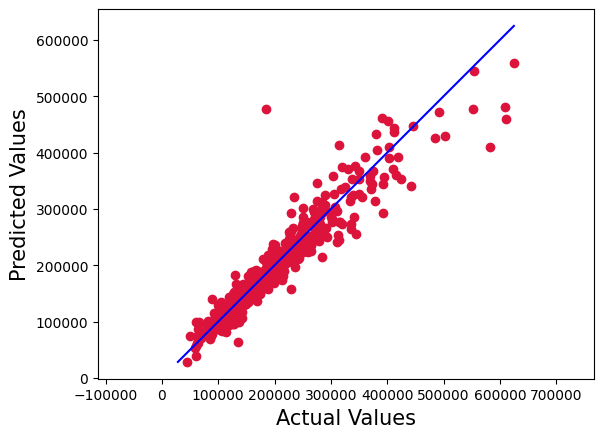

In [8]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(XGBoost_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

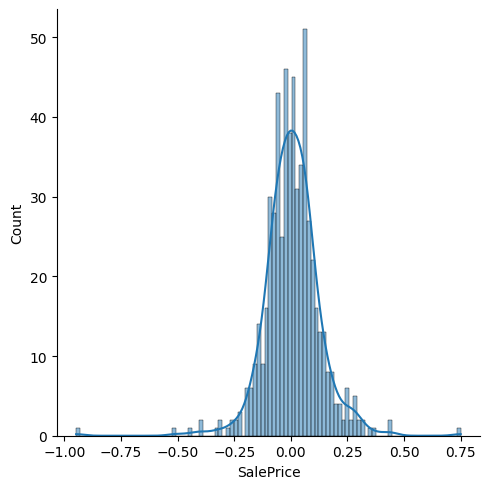

In [9]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - XGBoost_pred), bins = 100, kde = True)

## Step 6: Hyperparameter tuning (grid search)

In [10]:
# Specifies hyperparameter options
parameters = {'objective': ['reg:squarederror', 'reg:linear'], 'min_child_weight': [1, 2], 'gamma': [0.5, 1],
              'subsample': [0.2, 0.4], 'max_depth': [1, 2]}

In [11]:
# Apply grid search to find the best hyperparameter option
GS_CV_xgb = GridSearchCV(estimator = XGBoost, param_grid = parameters, cv = 5)
GS_CV_xgb.fit(x_train, y_train)
GS_CV_xgb.best_params_
# Return: {}

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:30:09] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python

{'gamma': 0.5,
 'max_depth': 2,
 'min_child_weight': 1,
 'objective': 'reg:squarederror',
 'subsample': 0.4}

In [12]:
# Built a XGBoost model with the new hyperparameter option
# {'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 1, 'objective': 'reg:squarederror', 'subsample': 0.4}
XGBoost_mod = xgb.XGBRegressor(objective = 'reg:squarederror', max_depth = 2, gamma = 0.5, min_child_weight = 1,
                               subsample = 0.4)
XGBoost_mod.fit(x_train, y_train)
XGBoost_pred = XGBoost_mod.predict(x_test)

## Step 7: Check for scores

In [13]:
# Check for the score of the prediction
XGBoost_mod_score = XGBoost_mod.score(x_train, y_train)
print('XGBoost Model Score: ', round(XGBoost_mod_score, 3))

# R squared value
r2 = r2_score(y_test, XGBoost_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, XGBoost_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, XGBoost_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(XGBoost_mod, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

XGBoost Model Score:  0.897
R Squared:  0.894
Adjusted R Squared:  0.883
Mean Squared Error:  0.02
Root Mean Squared Error:  0.14
Mean Absolute Error:  0.099
Accuracy:  87.26 %


## Step 8: Create visuals

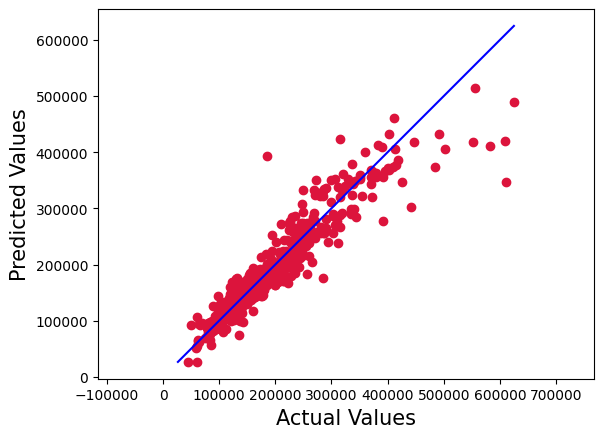

In [14]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(XGBoost_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

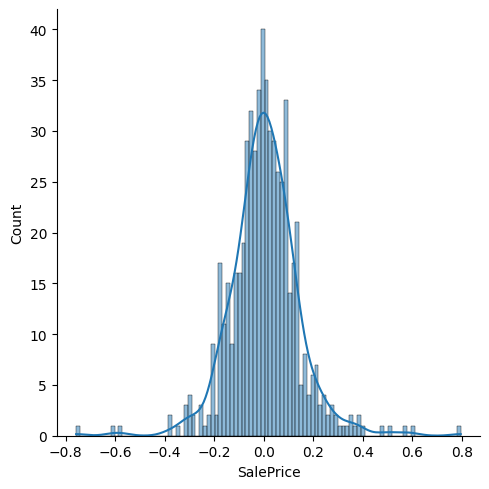

In [15]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - XGBoost_pred), bins = 100, kde = True)

## Step 9: Check feature important

<Axes: >

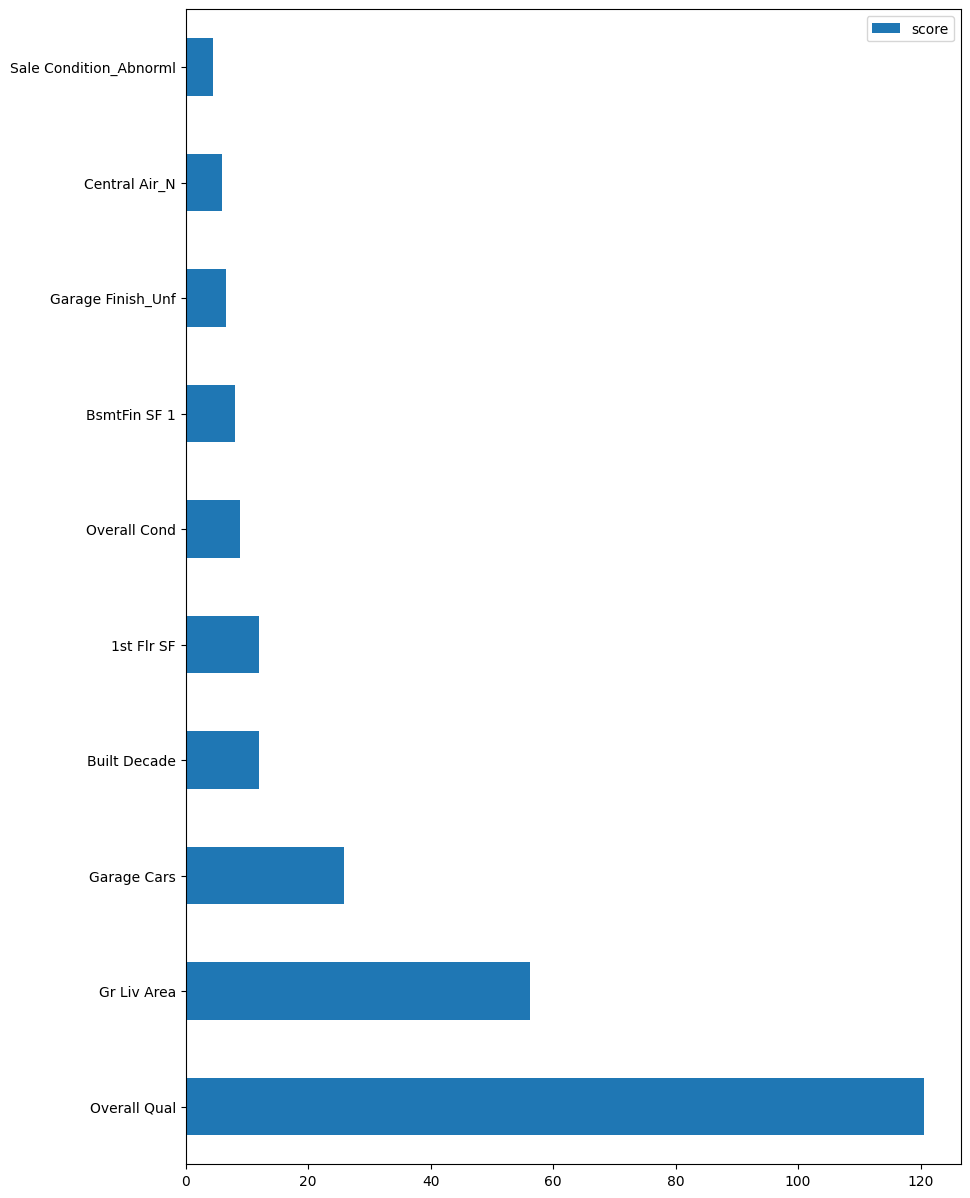

In [16]:
feature_important = XGBoost_mod.get_booster().get_score(importance_type = 'total_gain')
# Extract the feature names and scores
keys = list(feature_important.keys())
values = list(feature_important.values())
# Create a dataframe
data = pd.DataFrame(data = values, index = keys, columns = ['score']).sort_values(by = 'score', ascending = True)
# Plot the top 10 features
data.nlargest(10, columns = 'score').plot(kind = 'barh', figsize = (10, 15)) 

## Step 10: Hyperparameter tuning (optuna, with the same hyperparamter space as grid search)

In [17]:
def objective(trial):
    # Define hyperparameter search space
    parameters = {'objective': 'reg:squarederror',
             'min_child_weight': trial.suggest_int('min_child_weight', 1,2),
             'gamma': trial.suggest_int('gamma', 0.5, 1),
             'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
             'max_depth': trial.suggest_int('max_depth', 3, 9)}
    # Train xgboost model
    model = xgb.XGBRegressor(**parameters)
    model.fit(x_train, y_train, eval_set = [(x_test, y_test)],  verbose = False)
    # Evaluate model
    predict = model.predict(x_test)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    return rmse


In [18]:
# Run optuna optimization
study = optuna.create_study(direction = 'minimize')  # Minimize RMSE
study.optimize(objective, n_trials = 50)

# Print best hyperparameters
print('Best RMSE: ', study.best_value)
print('Best Hyperparameters: ', study.best_params)

[I 2025-04-05 18:33:33,483] A new study created in memory with name: no-name-1ae9b849-dffa-451e-b151-b4394757f3d5
/var/folders/bc/6ybxr1xs1f98kjg2pl98nqlc0000gn/T/ipykernel_56781/1484084565.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
[I 2025-04-05 18:33:33,756] Trial 0 finished with value: 0.12954180379358282 and parameters: {'min_child_weight': 2, 'gamma': 1, 'subsample': 0.879503559630413, 'max_depth': 7}. Best is trial 0 with value: 0.12954180379358282.
/var/folders/bc/6ybxr1xs1f98kjg2pl98nqlc0000gn/T/ipykernel_56781/1484084565.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),

Best RMSE:  0.10515475152878133
Best Hyperparameters:  {'min_child_weight': 2, 'gamma': 0, 'subsample': 0.9957577759157695, 'max_depth': 4}


In [19]:
# Built a XGBoost model with the new hyperparameter option
# {'min_child_weight': 2, 'gamma': 0, 'subsample': 0.9957577759157695, 'max_depth': 4}
xgb_mod = xgb.XGBRegressor(objective = 'reg:squarederror', max_depth = 4, gamma = 0, min_child_weight = 2, 
                           subsample = 0.9957577759157695)
xgb_mod.fit(x_train, y_train)
XGBoost_pred = xgb_mod.predict(x_test)

## Step 11: Check for scores

In [20]:
# Check for the score of the prediction
xgb_mod_score = xgb_mod.score(x_train, y_train)
print('XGBoost Model Score: ', round(xgb_mod_score, 3))

# R squared value
r2 = r2_score(y_test, XGBoost_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, XGBoost_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, XGBoost_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(xgb_mod, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

XGBoost Model Score:  0.985
R Squared:  0.94
Adjusted R Squared:  0.934
Mean Squared Error:  0.011
Root Mean Squared Error:  0.105
Mean Absolute Error:  0.076
Accuracy:  89.563 %


## Step 12: Create visuals

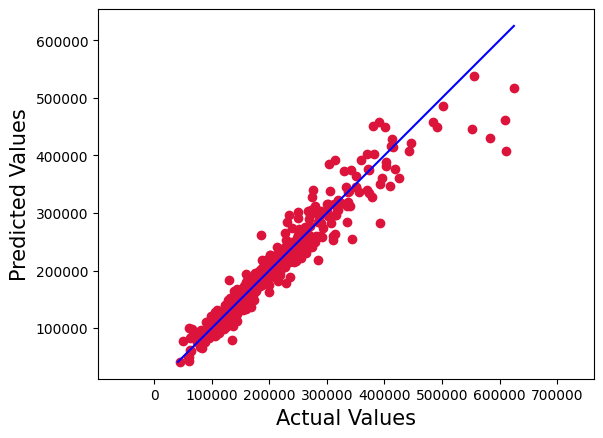

In [21]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(XGBoost_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

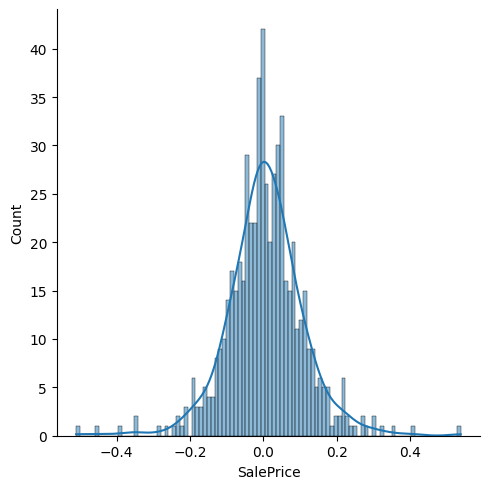

In [22]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - XGBoost_pred), bins = 100, kde = True)

## Step 13: Hyperparameter tuning (optuna, with bigger hyperparamter space)

In [23]:
def objective(trial):
    # Define hyperparameter search space
    parameters = {'objective': 'reg:squarederror',
             'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
             'gamma': trial.suggest_int('gamma', 0.1, 1),
             'subsample': trial.suggest_uniform('subsample', 0.05, 1.0),
             'max_depth': trial.suggest_int('max_depth', 1, 20),
             'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step = 100),
             'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
             'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0, 1.0)}
    # Train xgboost model
    model = xgb.XGBRegressor(**parameters)
    model.fit(x_train, y_train, eval_set = [(x_test, y_test)],  verbose = False)
    # Evaluate model
    predict = model.predict(x_test)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    return rmse

In [24]:
# Run optuna optimization
study = optuna.create_study(direction = 'minimize')  # Minimize RMSE
study.optimize(objective, n_trials = 50)

# Print best hyperparameters
print('Best RMSE: ', study.best_value)
print('Best Hyperparameters: ', study.best_params)

[I 2025-04-05 18:35:06,399] A new study created in memory with name: no-name-e8ea7537-5f7e-43a1-b176-269a5c29fffe
/var/folders/bc/6ybxr1xs1f98kjg2pl98nqlc0000gn/T/ipykernel_56781/3491079507.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.05, 1.0),
/var/folders/bc/6ybxr1xs1f98kjg2pl98nqlc0000gn/T/ipykernel_56781/3491079507.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
/var/folders/bc/6ybxr1xs1f98kjg2pl98nqlc0000gn/T/ipykernel_56781/3491079507.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/o

Best RMSE:  0.10352359474768445
Best Hyperparameters:  {'min_child_weight': 7, 'gamma': 0, 'subsample': 0.9170665228361083, 'max_depth': 5, 'n_estimators': 700, 'learning_rate': 0.10377602456854357, 'colsample_bytree': 0.13699095111031812}


In [25]:
# Built a XGBoost model with the new hyperparameter option
# {'min_child_weight': 7, 'gamma': 0, 'subsample': 0.9170665228361083, 'max_depth': 5, 'n_estimators': 700, 
# 'learning_rate': 0.10377602456854357, 'colsample_bytree': 0.13699095111031812}
xgboost_mod = xgb.XGBRegressor(objective = 'reg:squarederror', min_child_weight = 7, gamma = 0, 
                               subsample = 0.9170665228361083, max_depth = 5, n_estimators = 700, 
                               learning_rate = 0.10377602456854357, colsample_bytree = 0.13699095111031812)
xgboost_mod.fit(x_train, y_train)
XGBoost_pred = xgboost_mod.predict(x_test)

## Step 14: Check for scores

In [26]:
# Check for the score of the prediction
xgboost_mod_score = xgboost_mod.score(x_train, y_train)
print('XGBoost Model Score: ', round(xgboost_mod_score, 3))

# R squared value
r2 = r2_score(y_test, XGBoost_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, XGBoost_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, XGBoost_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(xgboost_mod, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

XGBoost Model Score:  0.996
R Squared:  0.942
Adjusted R Squared:  0.936
Mean Squared Error:  0.011
Root Mean Squared Error:  0.104
Mean Absolute Error:  0.072
Accuracy:  90.807 %


## Step 15: Create visuals

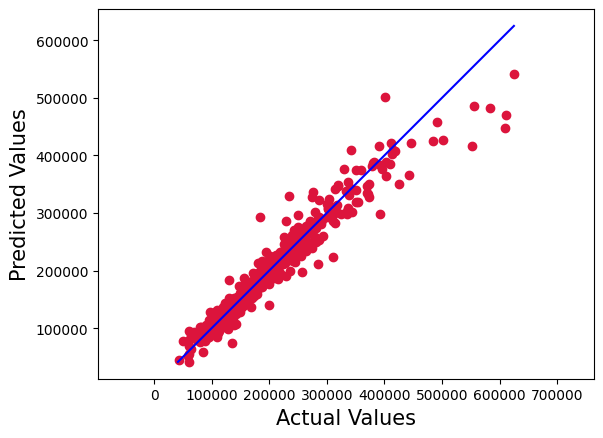

In [27]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(XGBoost_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

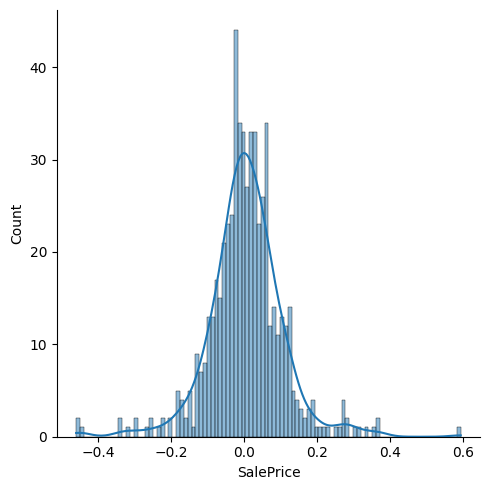

In [28]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - XGBoost_pred), bins = 100, kde = True)

## Step 16: Check feature important

<Axes: >

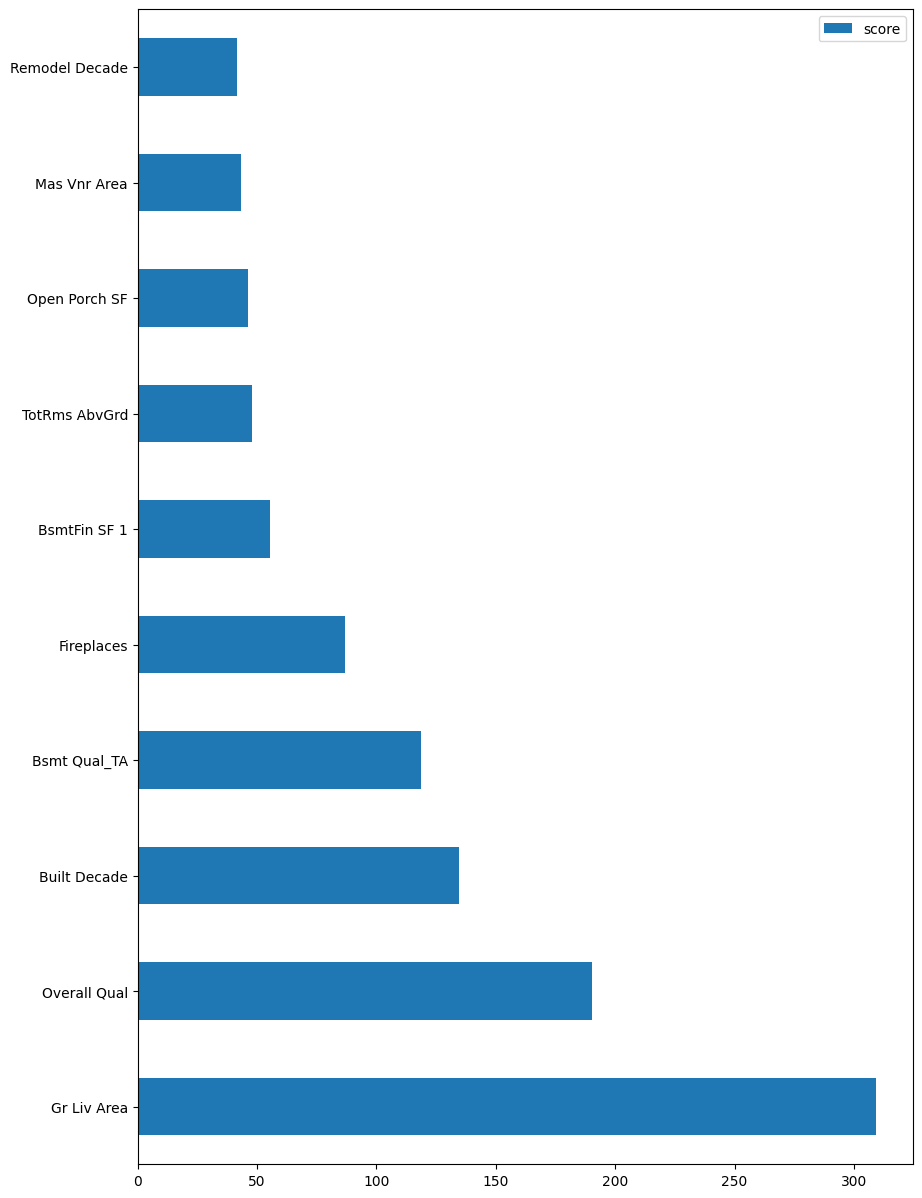

In [29]:
feature_important = xgboost_mod.get_booster().get_score(importance_type = 'total_gain')
# Extract the feature names and scores
keys = list(feature_important.keys())
values = list(feature_important.values())
# Create a dataframe
data = pd.DataFrame(data = values, index = keys, columns = ['score']).sort_values(by = 'score', ascending = True)
# Plot the top 10 features
data.nlargest(10, columns = 'score').plot(kind = 'barh', figsize = (10, 15)) 